In [15]:
import pandas as pd

# Загрузка
train = pd.read_csv("../data/raw/train.csv", parse_dates=["Date"])
features = pd.read_csv("../data/raw/features.csv", parse_dates=["Date"])
stores = pd.read_csv("../data/raw/stores.csv")

# Базовый обзор
display(train.head())
print("Shape:", train.shape)
print(train.isna().sum())

# Слияние данных
df = train.merge(features, on=["Store","Date","IsHoliday"], how="left") \
          .merge(stores, on="Store", how="left")
print("Merged shape:", df.shape)
display(df.head())
print(df.isna().sum())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Shape: (421570, 5)
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Merged shape: (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64


In [16]:
df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = \
    df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)


In [17]:
df['Year']       = df['Date'].dt.year
df['Month']      = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfWeek']  = df['Date'].dt.dayofweek

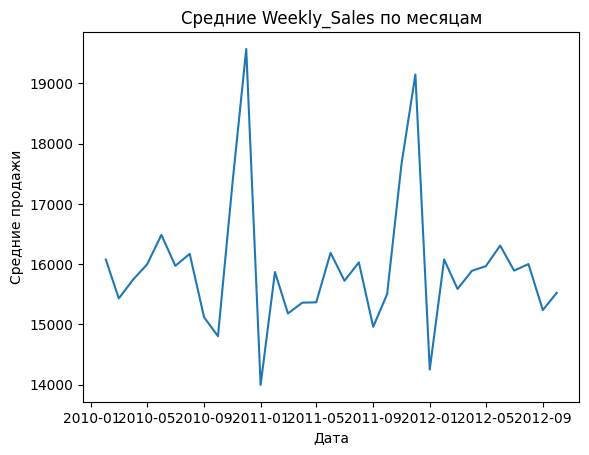

In [18]:
import matplotlib.pyplot as plt

# Агрегируем
monthly = df.groupby(['Year','Month'])['Weekly_Sales'].mean().reset_index()

# Линейный график
plt.plot(
    pd.to_datetime(monthly.Year.astype(str) + '-' + monthly.Month.astype(str)),
    monthly.Weekly_Sales
)
plt.title("Средние Weekly_Sales по месяцам")
plt.xlabel("Дата")
plt.ylabel("Средние продажи")
plt.show()


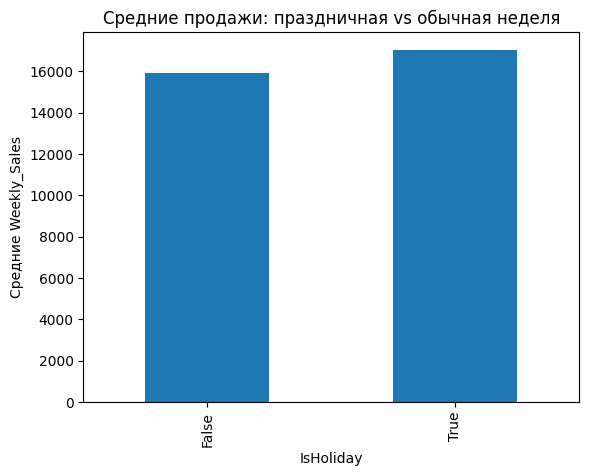

In [19]:
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_sales.plot.bar()
plt.title("Средние продажи: праздничная vs обычная неделя")
plt.ylabel("Средние Weekly_Sales")
plt.show()

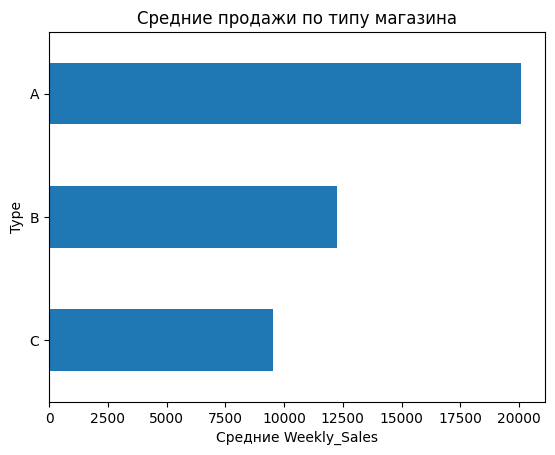

In [20]:
type_sales = df.groupby('Type')['Weekly_Sales'].mean().sort_values()
type_sales.plot.barh()
plt.title("Средние продажи по типу магазина")
plt.xlabel("Средние Weekly_Sales")
plt.show()
